In [1]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer


# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery


# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization


# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
log = xes_importer.apply("C:\\Users\\20204502\\Downloads\\BPI_Challenge_2012.xes.gz")


parsing log, completed traces :: 100%|██████████| 13087/13087 [00:14<00:00, 906.17it/s] 


In [3]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter


log_start = start_activities_filter.get_start_activities(log)
end_activities = end_activities_filter.get_end_activities(log)
log_start  # Printing the start activity in our log

{'A_SUBMITTED': 13087}

In [4]:
end_activities  # Printing the end activity in our log


{'W_Valideren aanvraag': 2747,
 'W_Wijzigen contractgegevens': 4,
 'A_DECLINED': 3429,
 'W_Completeren aanvraag': 1939,
 'A_CANCELLED': 655,
 'W_Nabellen incomplete dossiers': 452,
 'W_Afhandelen leads': 2234,
 'W_Nabellen offertes': 1290,
 'W_Beoordelen fraude': 57,
 'O_CANCELLED': 279,
 'A_REGISTERED': 1}

In [5]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics
variants = variants_filter.get_variants(log)
  
print(f"We have {len(variants)} variants in our log")

We have 4366 variants in our log


In [6]:
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
## Printing the top 10 variants by case number
variants_count[:10] 


[{'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,A_DECLINED', 'count': 3429},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_DECLINED,W_Afhandelen leads',
  'count': 1872},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,A_DECLINED,W_Afhandelen leads',
  'count': 271},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_DECLINED,W_Completeren aanvraag',
  'count': 209},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_DECLINED,W_Completeren aanvraag',
  'count': 160},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag',
  'count': 134},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W

In [7]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
activities


{'A_SUBMITTED': 13087,
 'A_PARTLYSUBMITTED': 13087,
 'A_PREACCEPTED': 7367,
 'W_Completeren aanvraag': 54850,
 'A_ACCEPTED': 5113,
 'O_SELECTED': 7030,
 'A_FINALIZED': 5015,
 'O_CREATED': 7030,
 'O_SENT': 7030,
 'W_Nabellen offertes': 52016,
 'O_SENT_BACK': 3454,
 'W_Valideren aanvraag': 20809,
 'A_REGISTERED': 2246,
 'A_APPROVED': 2246,
 'O_ACCEPTED': 2243,
 'A_ACTIVATED': 2246,
 'O_CANCELLED': 3655,
 'W_Wijzigen contractgegevens': 12,
 'A_DECLINED': 7635,
 'A_CANCELLED': 2807,
 'W_Afhandelen leads': 16566,
 'O_DECLINED': 802,
 'W_Nabellen incomplete dossiers': 25190,
 'W_Beoordelen fraude': 664}

In [8]:
import os 
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\\Graphviz\\bin" # First install graphviz via the website, then run this code
# The program should be added to the PATH somewhere on your computer, there is a little instruction for this online.

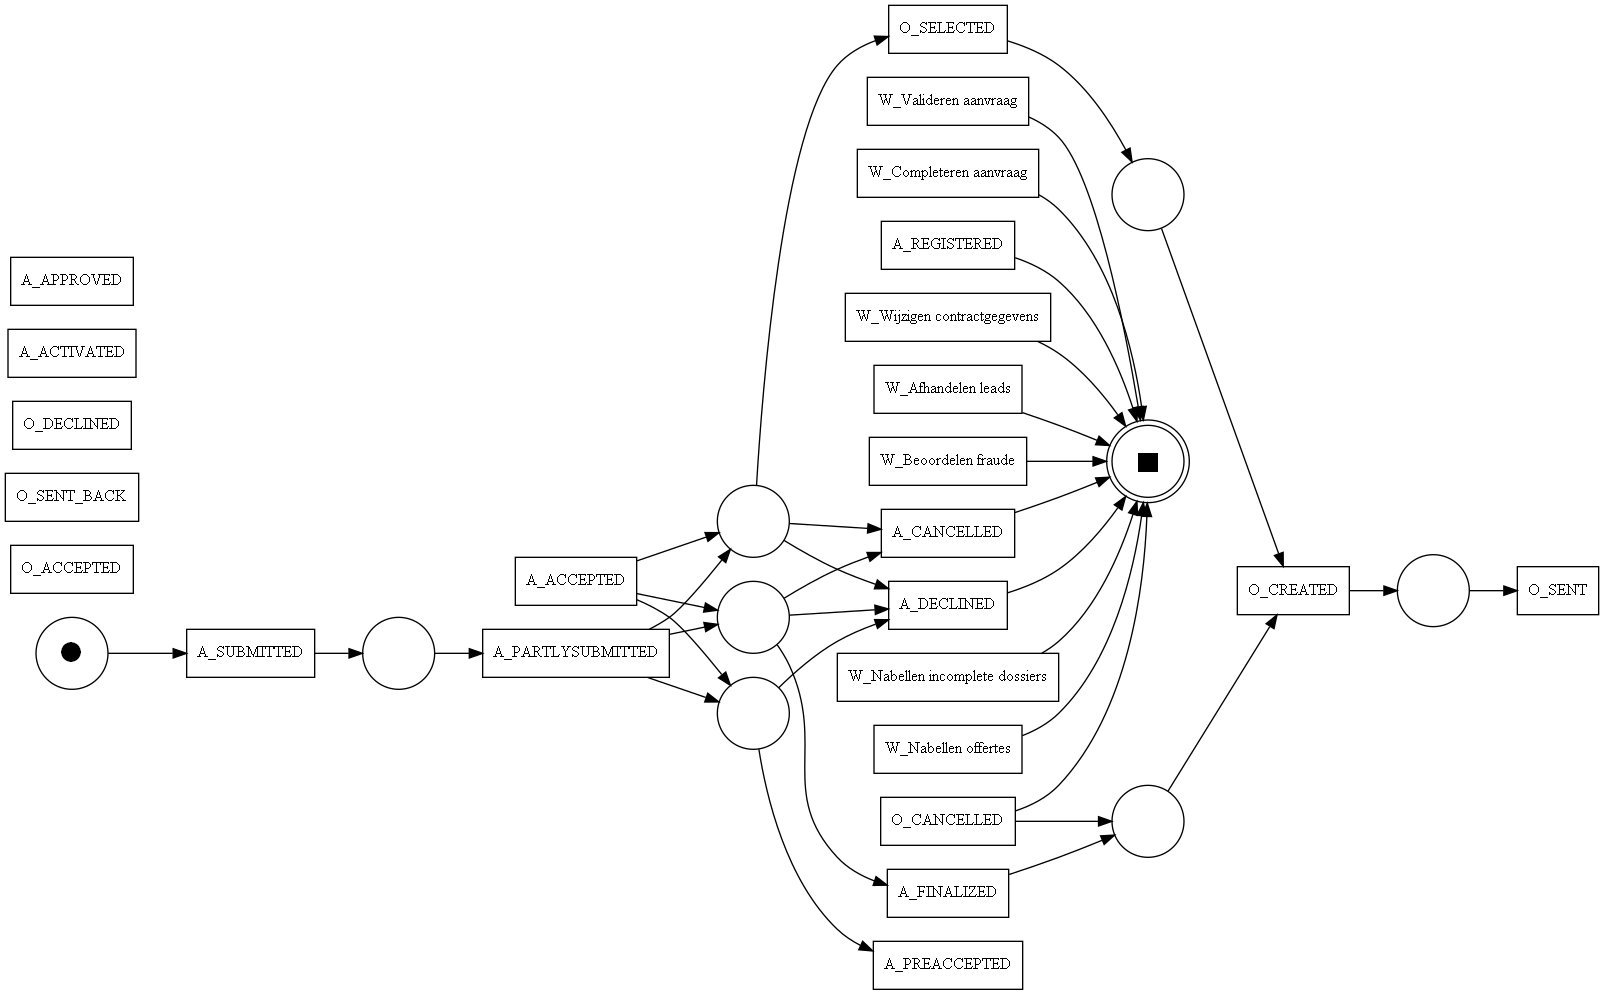

replaying log with TBR, completed variants :: 100%|██████████| 4366/4366 [00:17<00:00, 253.04it/s]


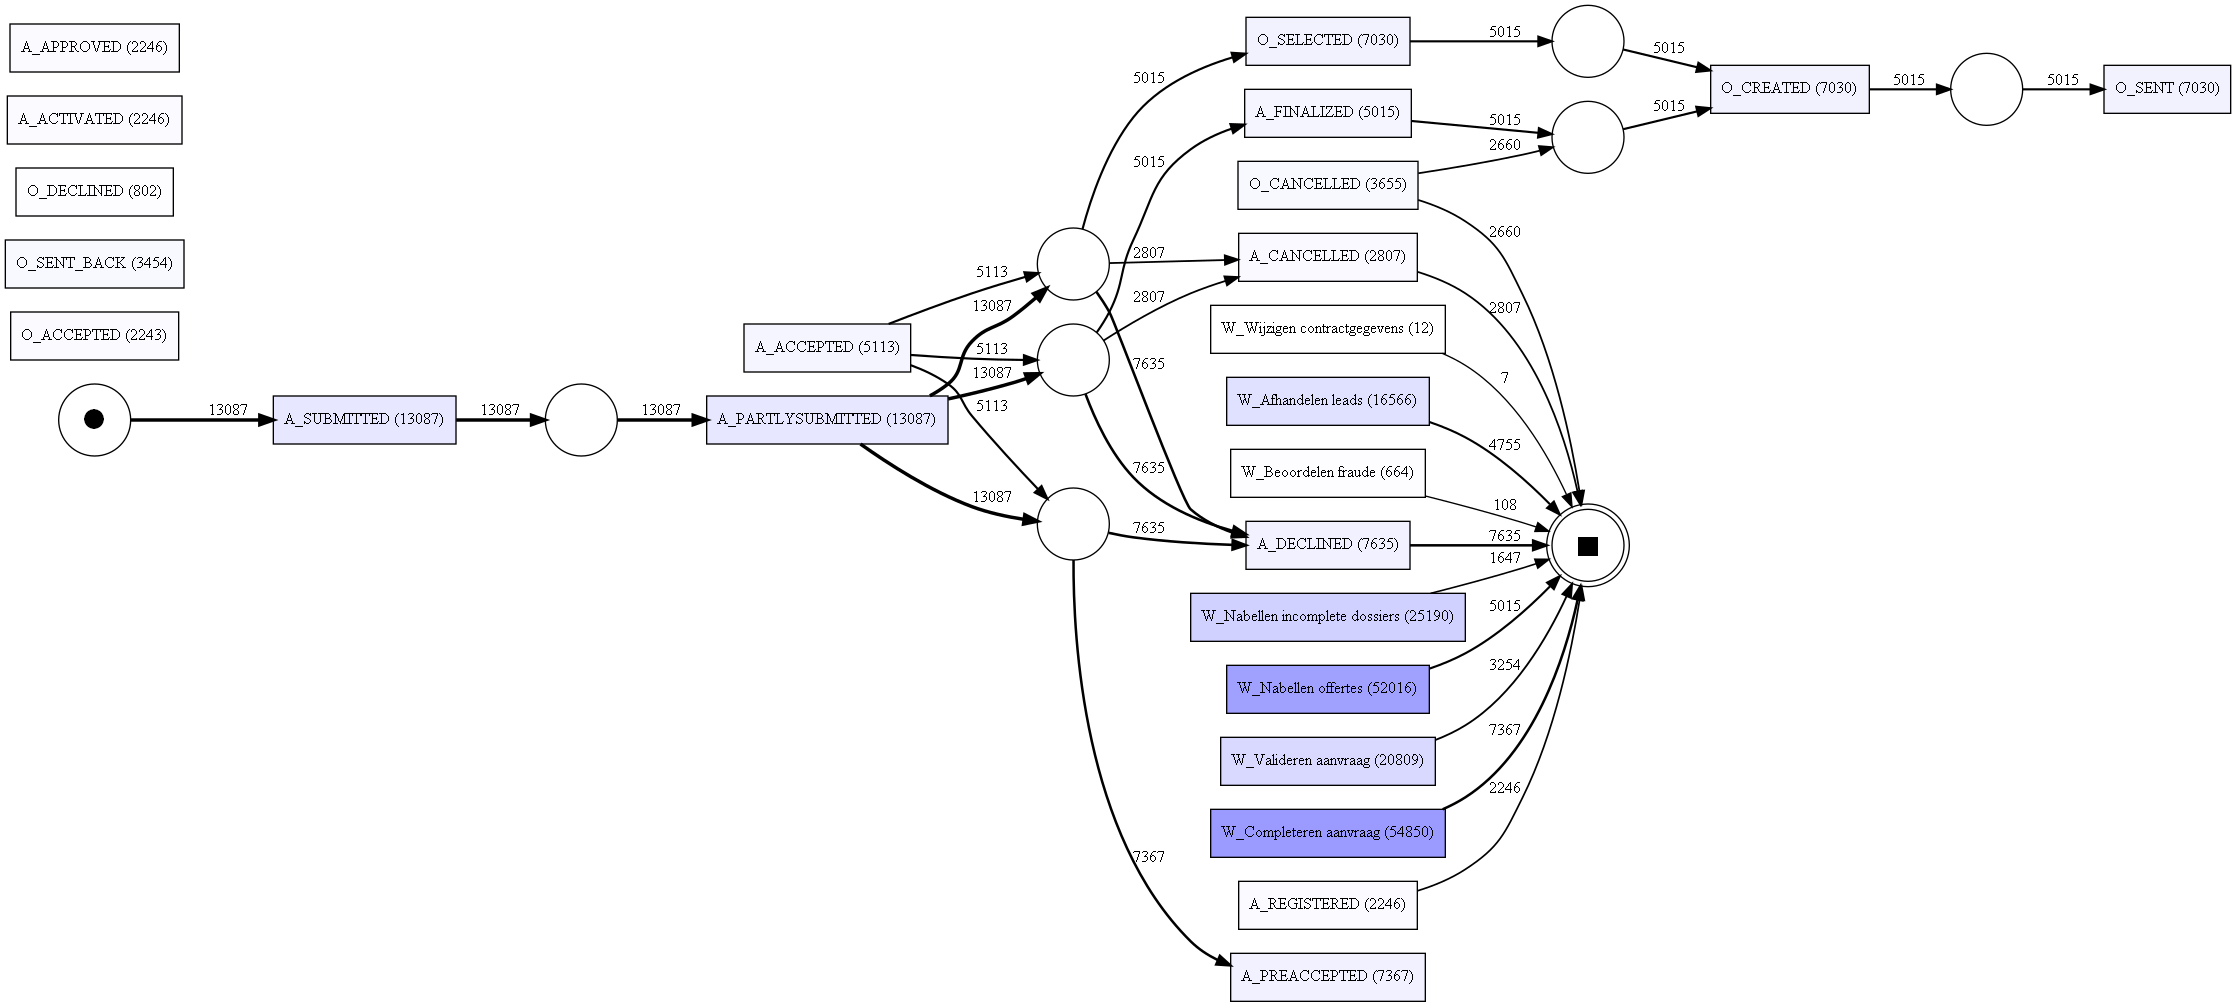

In [9]:
net, initial_marking, final_marking = alpha_miner.apply(log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)



## Adding frequency will make it more informative.

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)

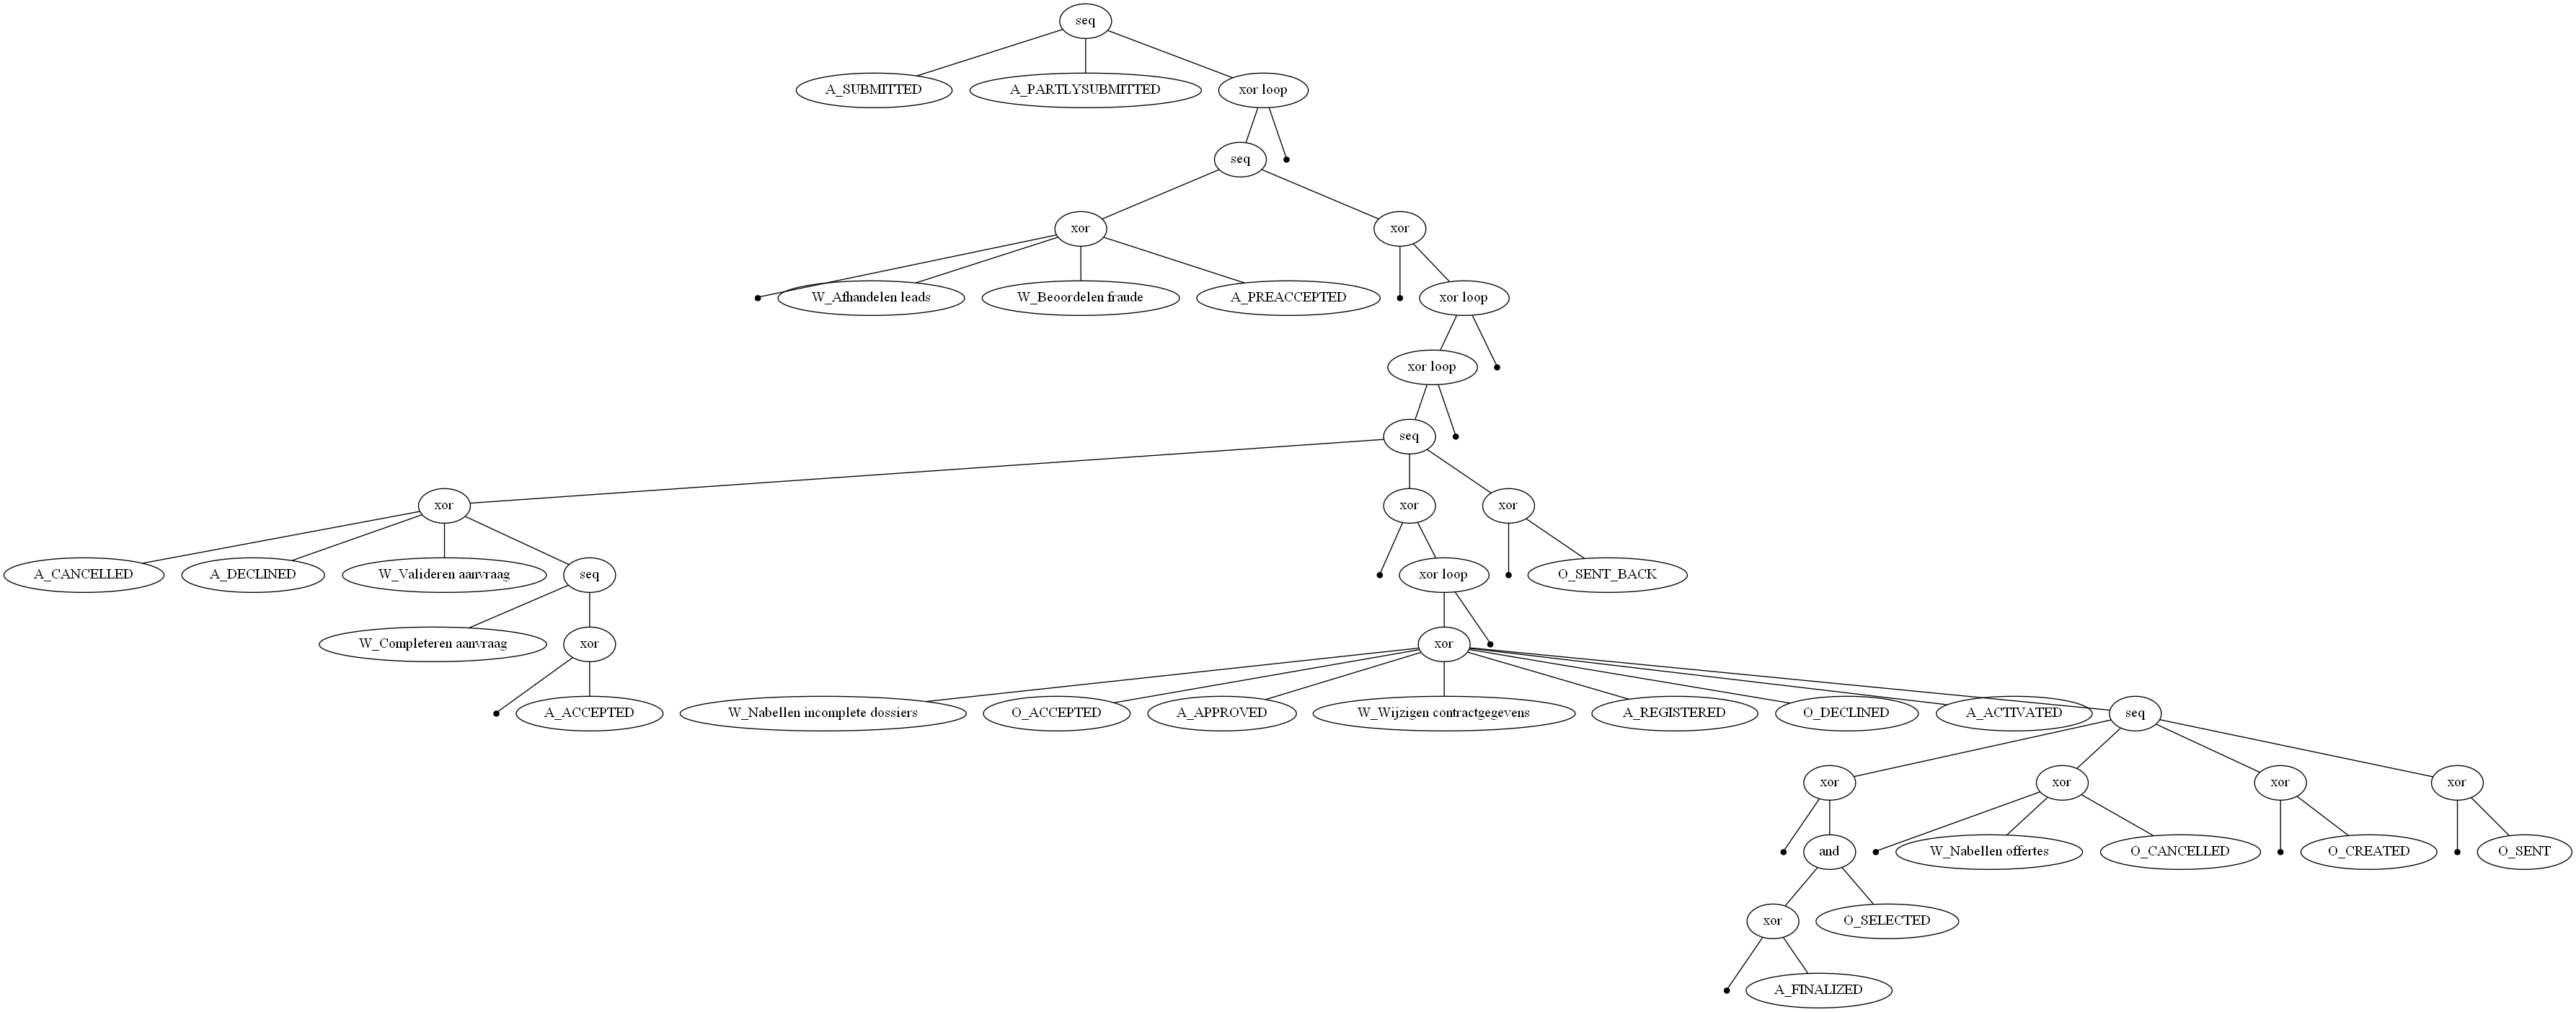

In [10]:
tree = inductive_miner.apply_tree(log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

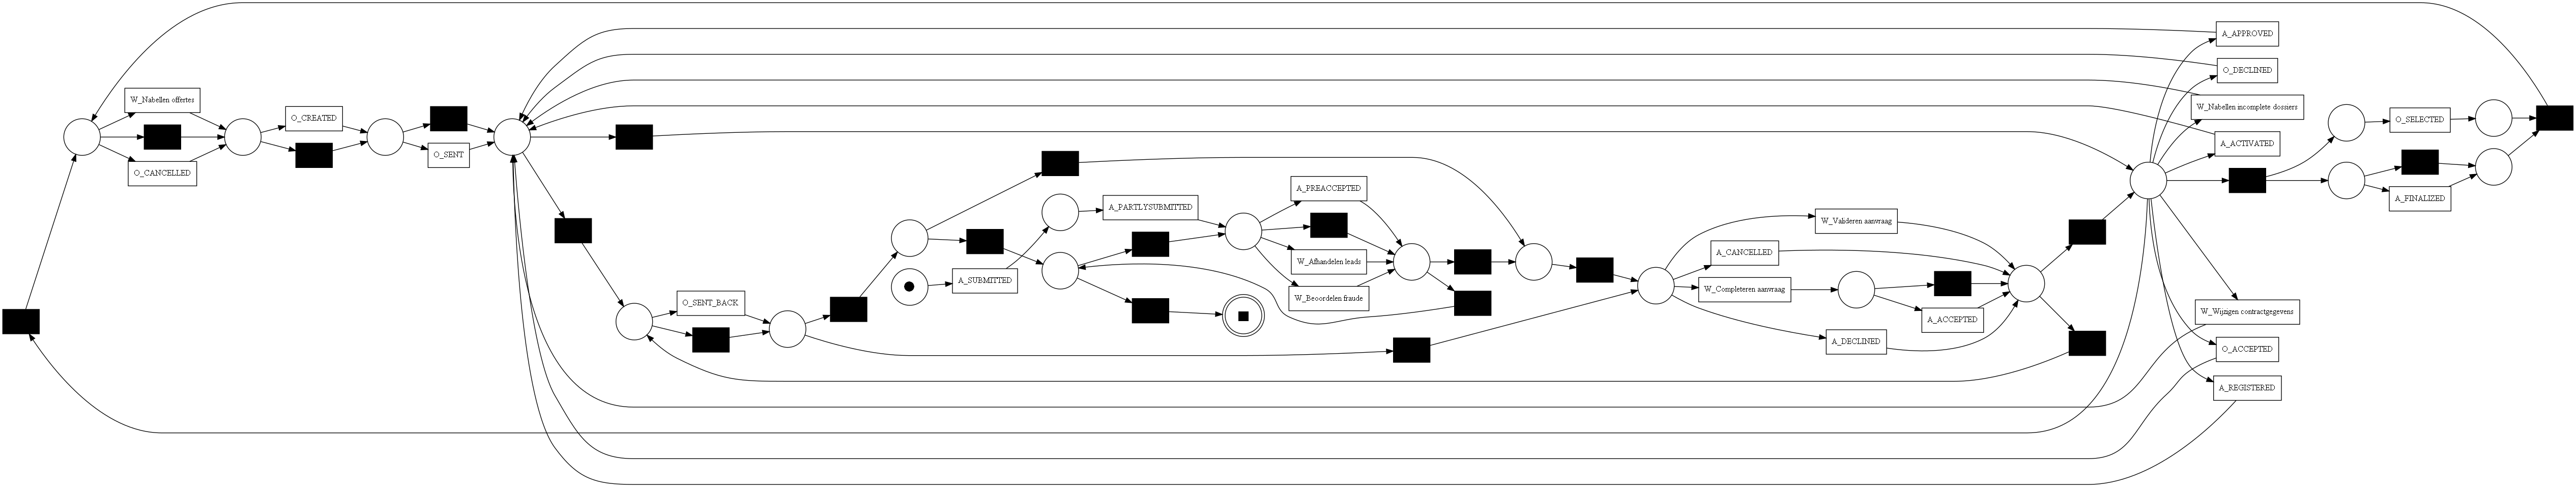

In [11]:
net, initial_marking, final_marking = pt_converter.apply(tree, 
variant=pt_converter.Variants.TO_PETRI_NET)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

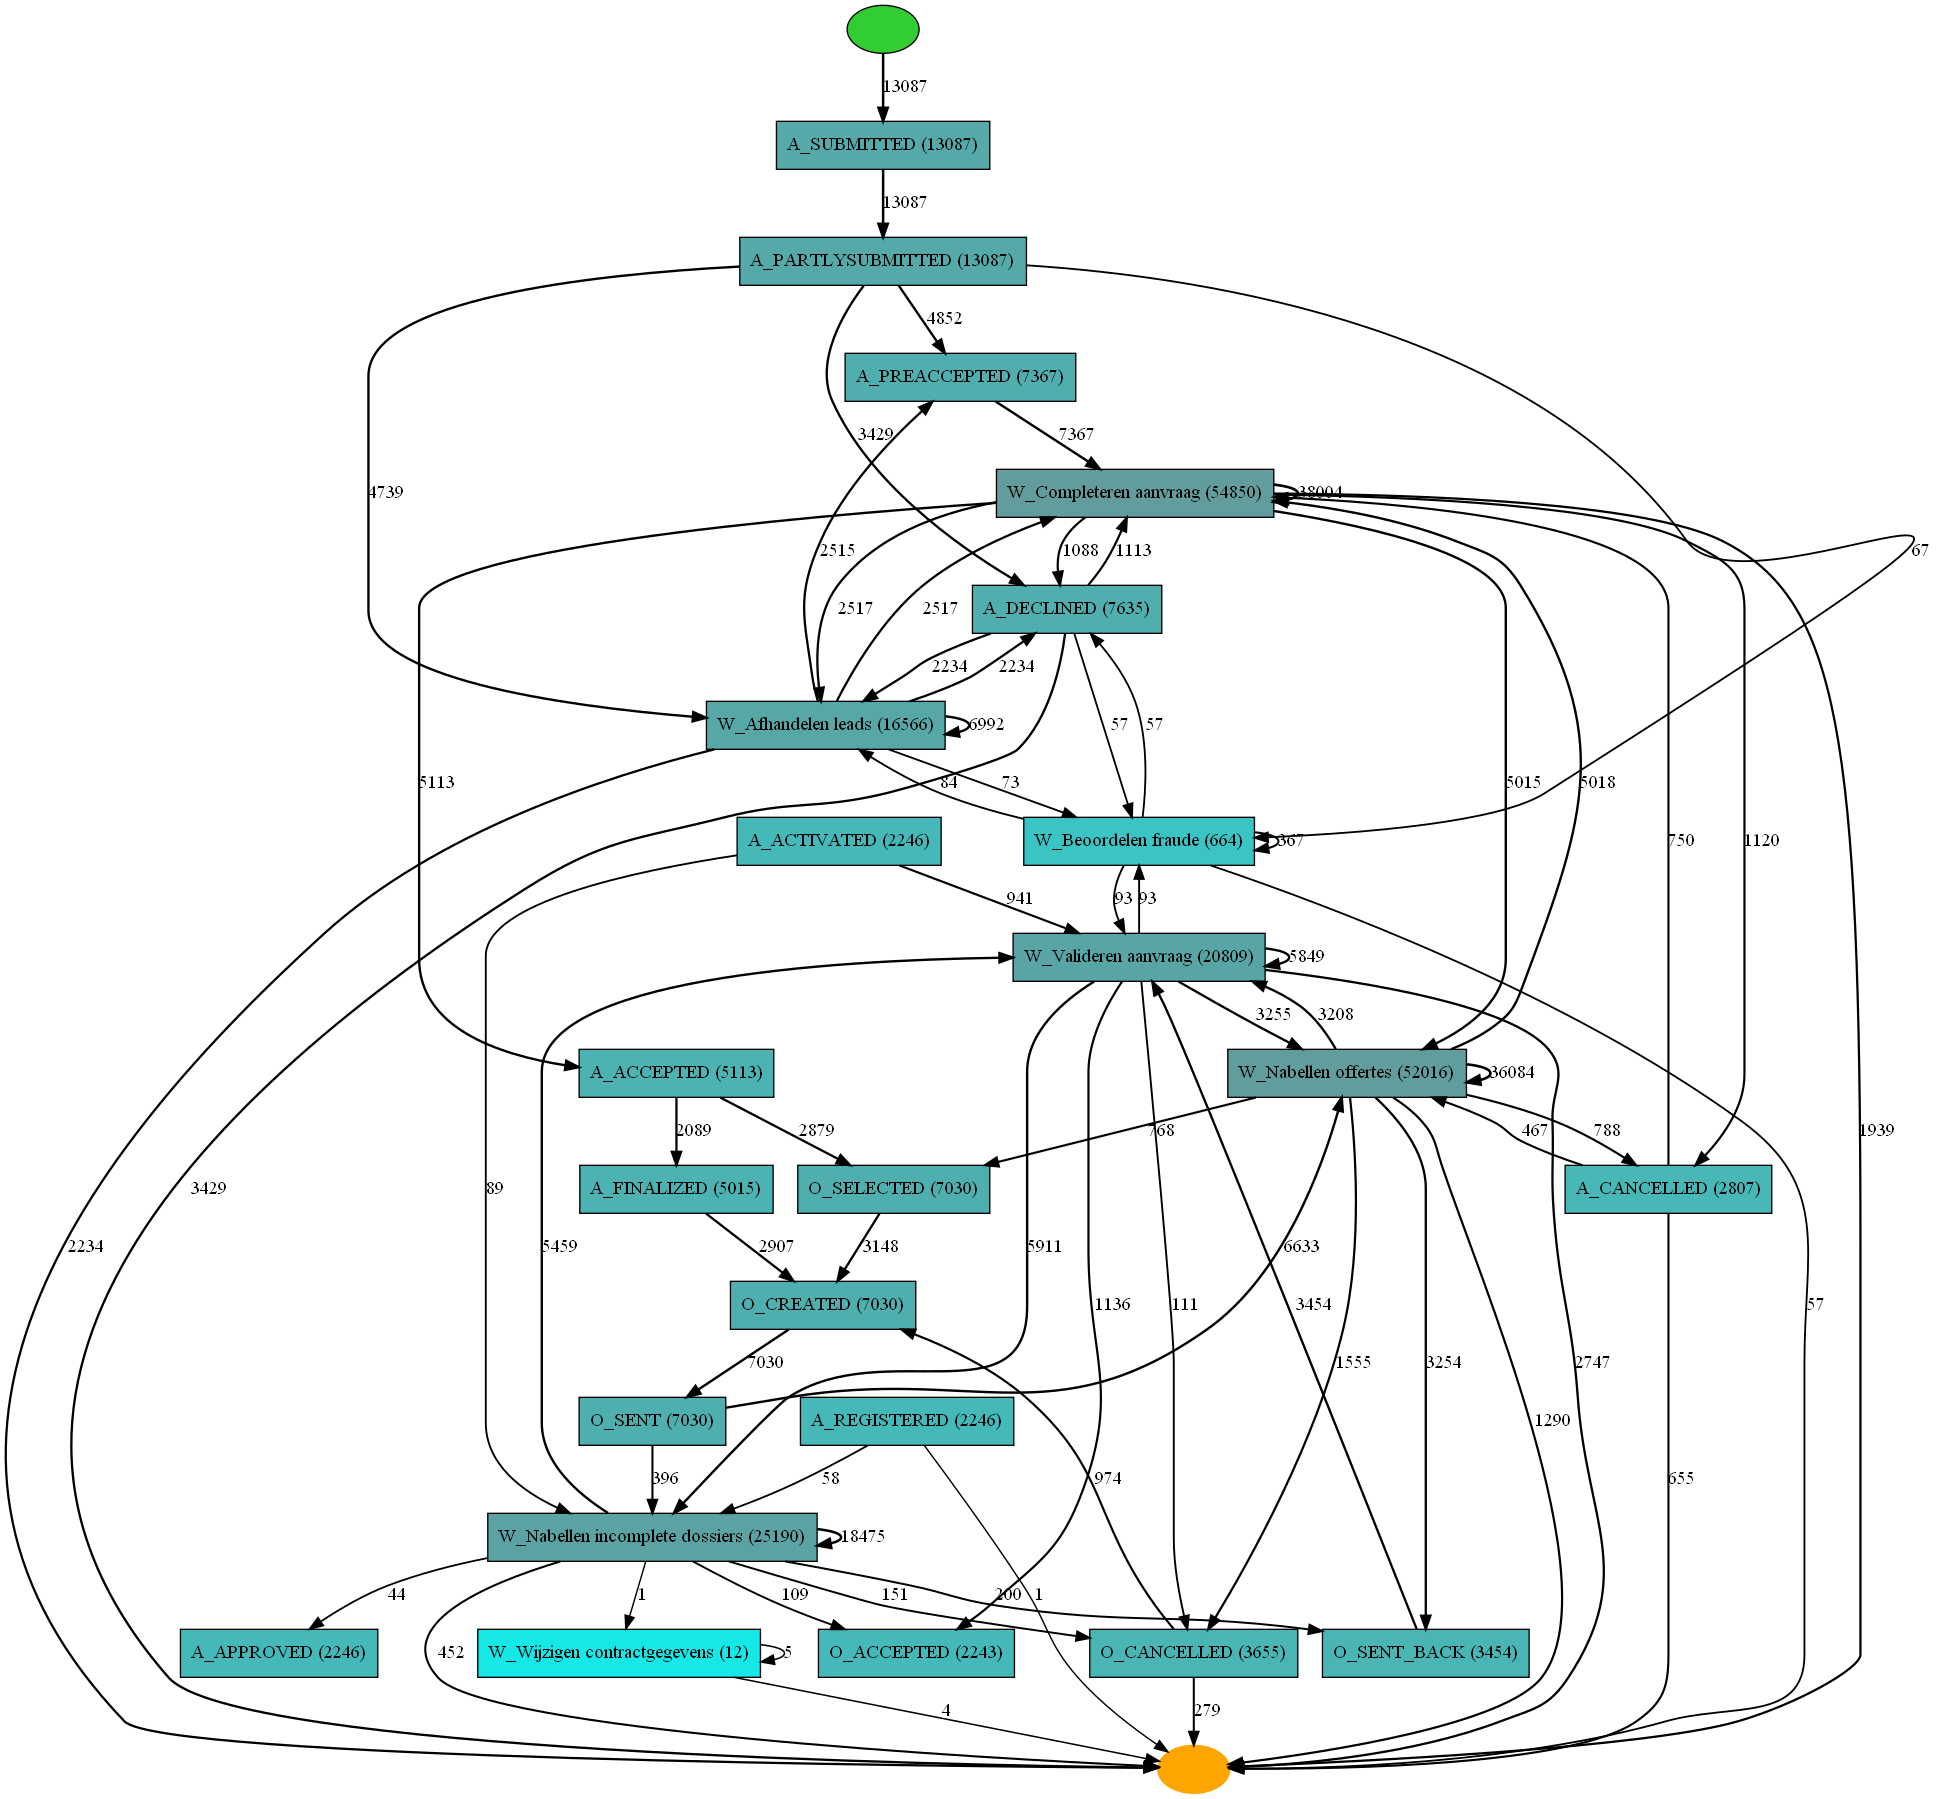

In [12]:
heu_net = heuristics_miner.apply_heu(log, 
parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.5})

gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

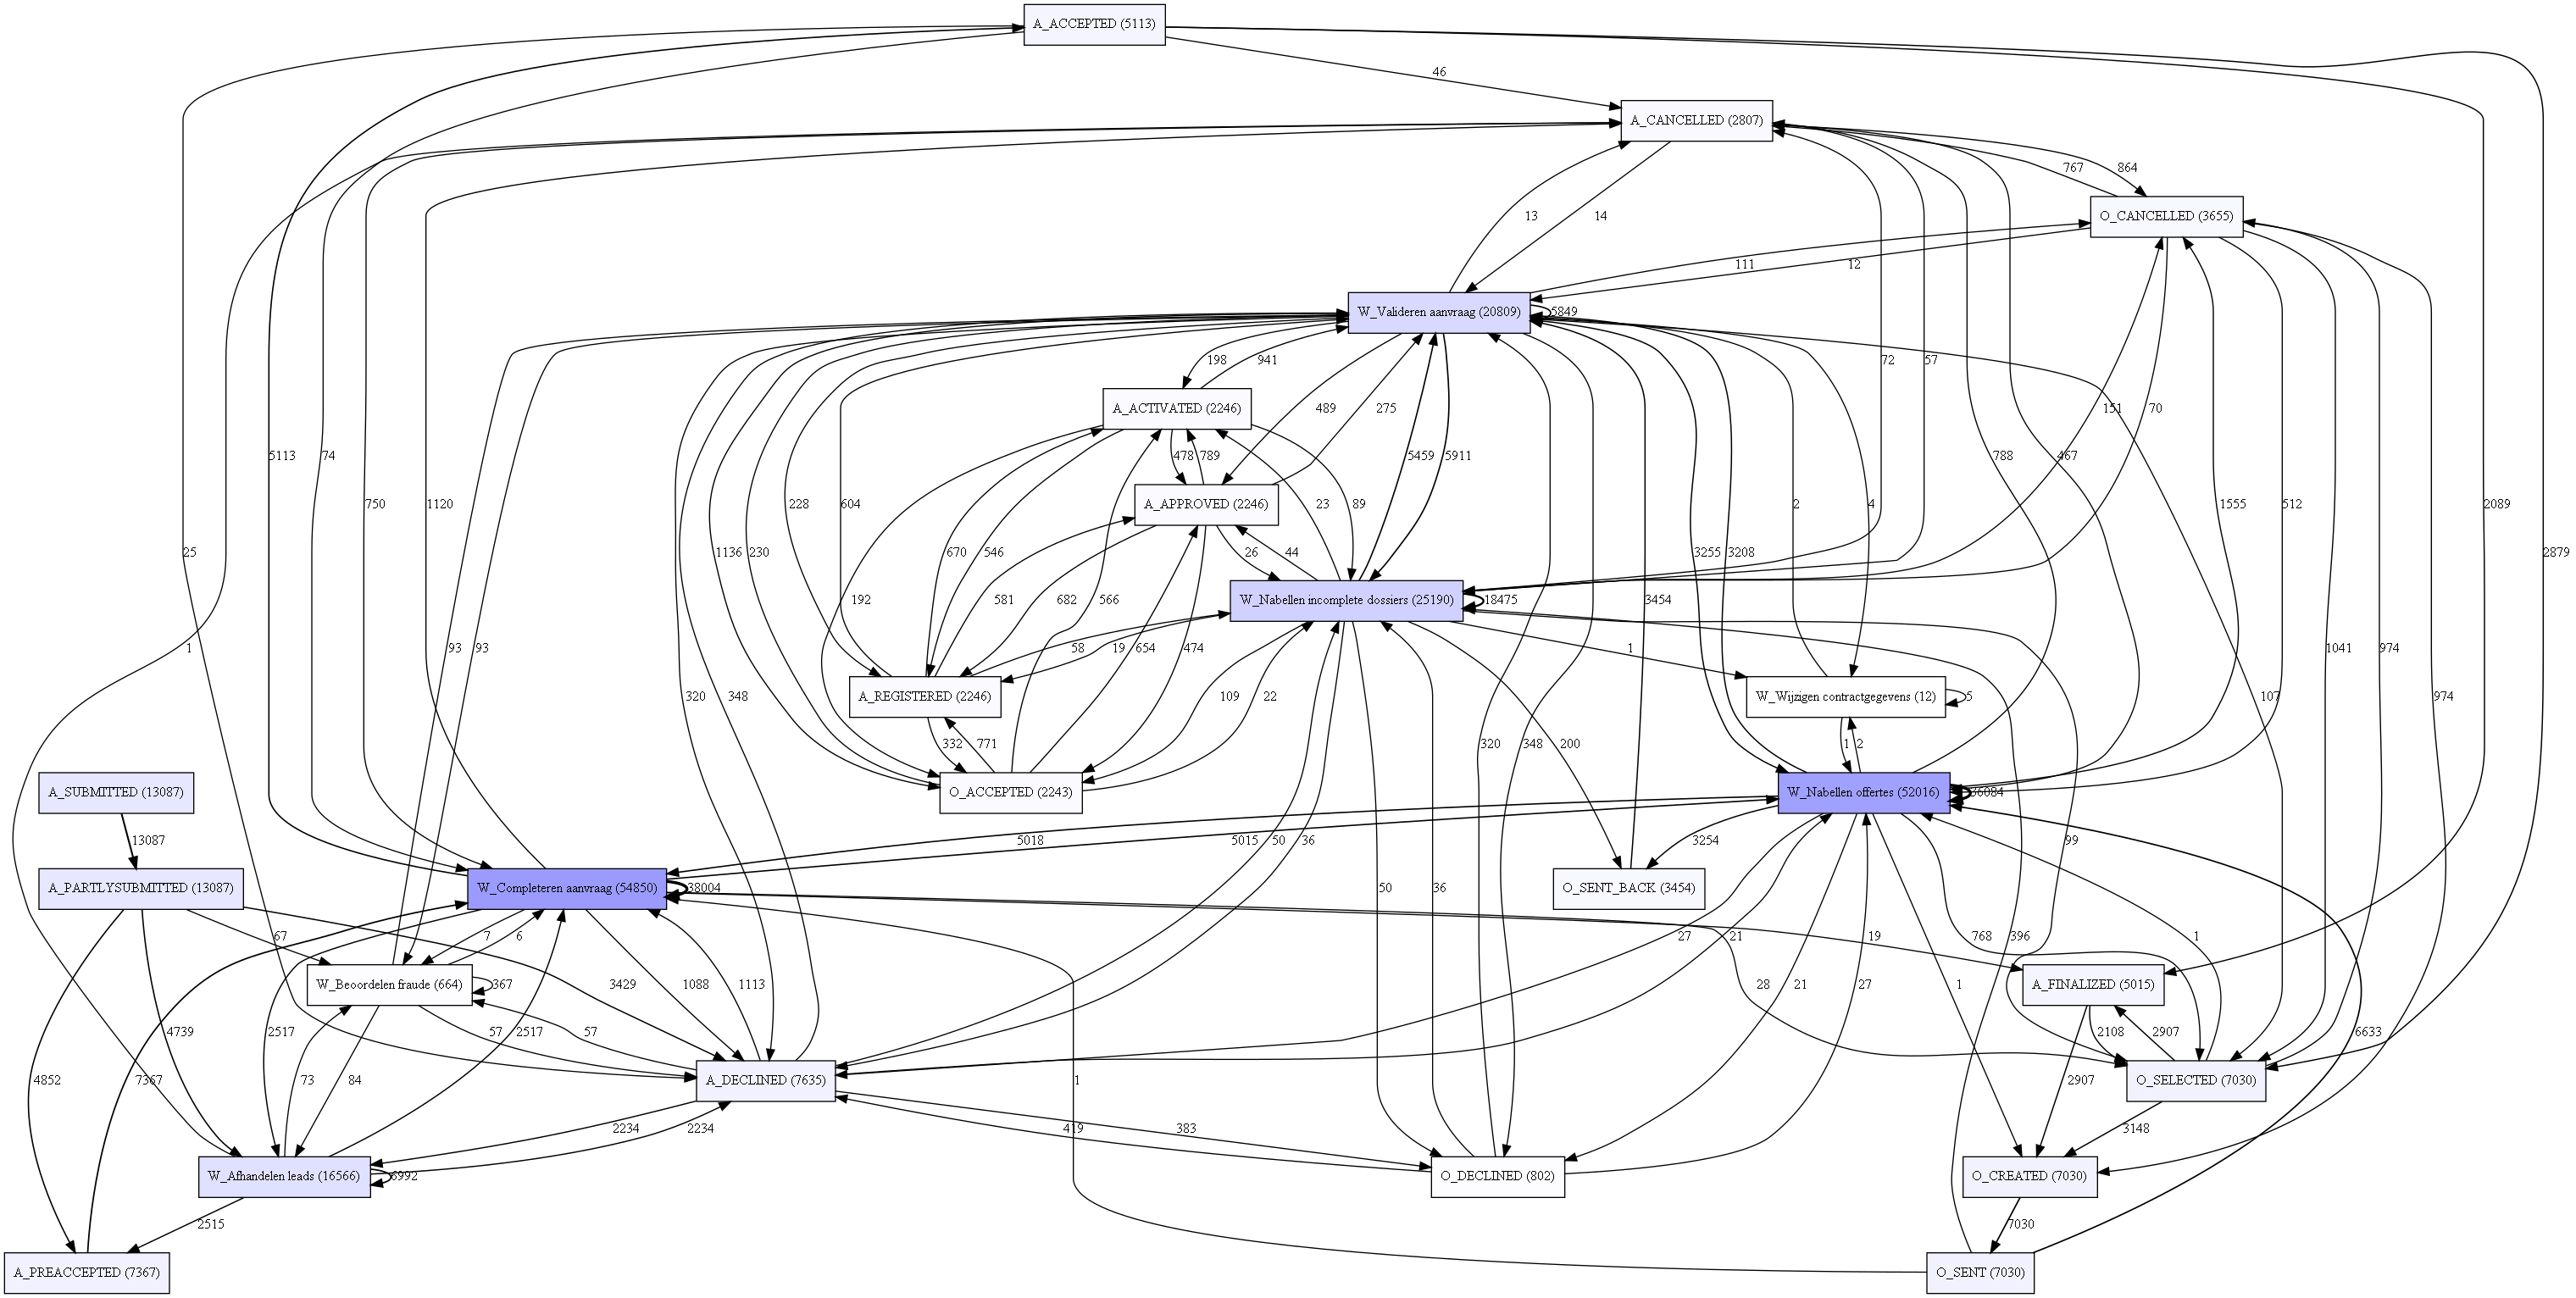

In [15]:
dfg = dfg_discovery.apply(log)


from pm4py.visualization.dfg import visualizer as dfg_visualization

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

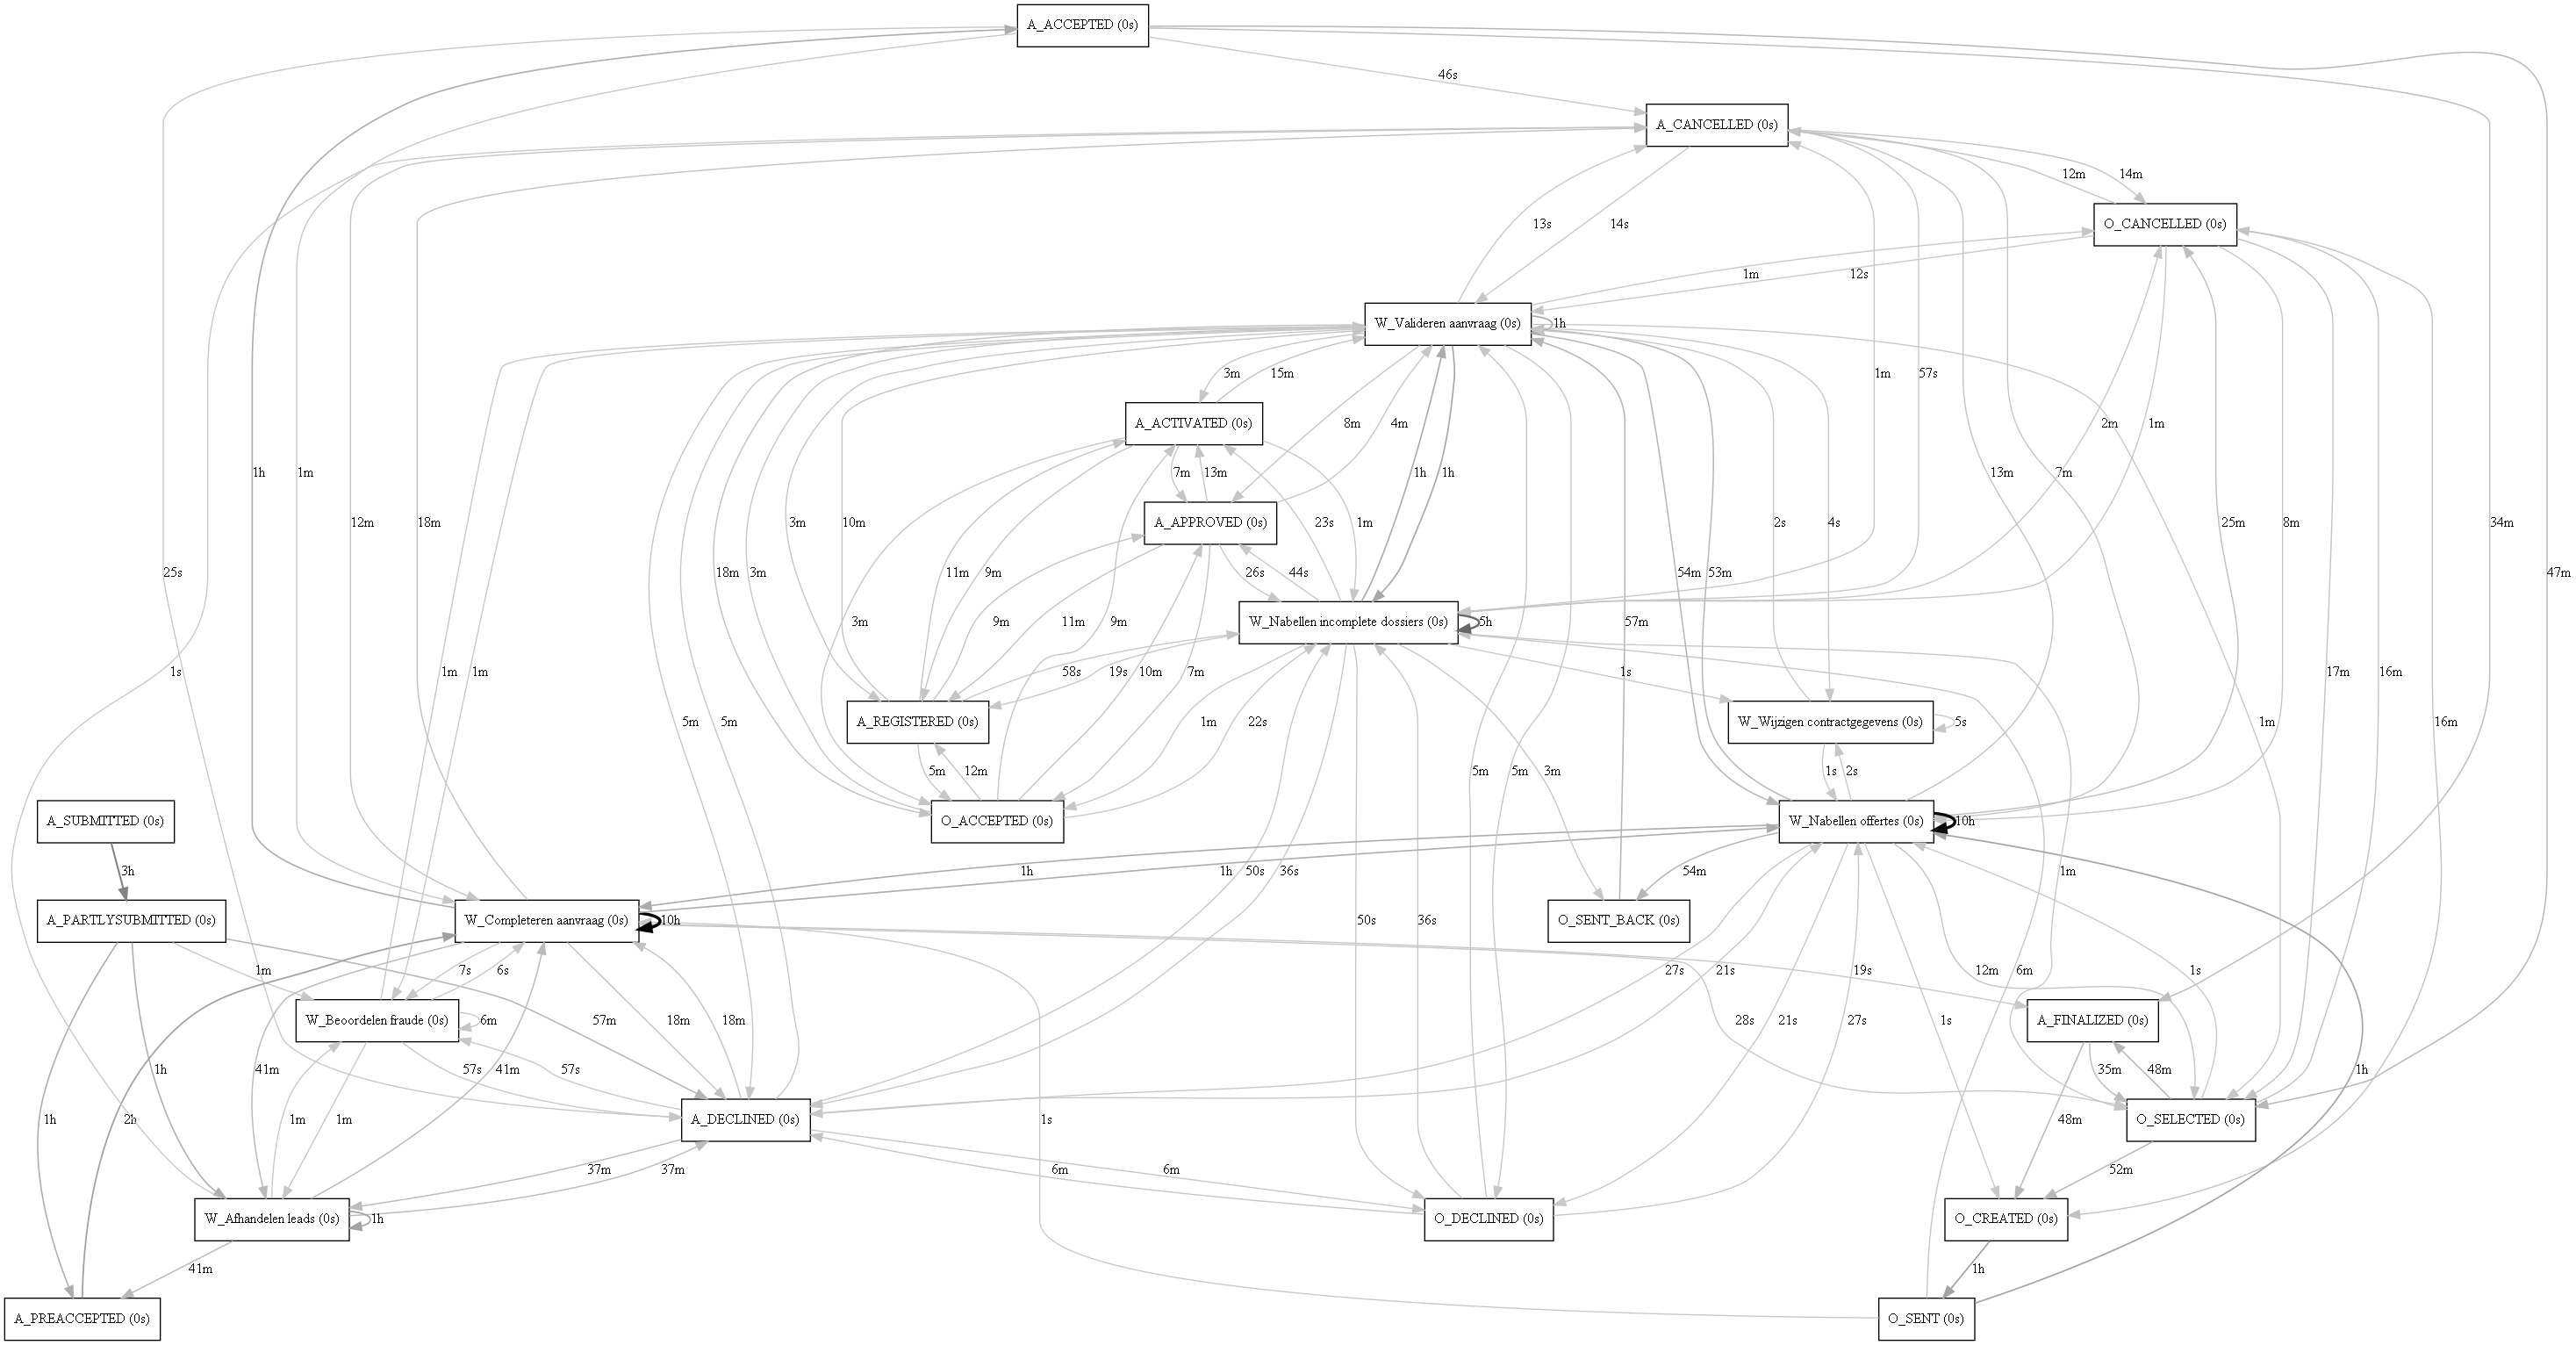

In [16]:
dfg = dfg_discovery.apply(log)


from pm4py.visualization.dfg import visualizer as dfg_visualization

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)